# Which locations have the highest/lowest incidence of heart disease?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
heartDF = pd.read_csv('Resources/heart_2022_no_nans.csv')
heartDF.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

In [3]:
# heartDF.dtypes

In [4]:
heartReducedDF = heartDF[["State", "Sex", "GeneralHealth", "PhysicalHealthDays", "HadHeartAttack", "HadAngina"]]
heartReducedDF.head()

State     Sex GeneralHealth  PhysicalHealthDays HadHeartAttack HadAngina
0  Alabama  Female     Very good                 4.0             No        No
1  Alabama    Male     Very good                 0.0             No        No
2  Alabama    Male     Very good                 0.0             No        No
3  Alabama  Female          Fair                 5.0             No        No
4  Alabama  Female          Good                 3.0             No        No

In [5]:
attackPOS = heartReducedDF.loc[(heartReducedDF["HadHeartAttack"] == "Yes")]
attackPOS.head()

State   Sex GeneralHealth  PhysicalHealthDays HadHeartAttack HadAngina
7   Alabama  Male          Fair                 5.0            Yes       Yes
12  Alabama  Male          Good                 5.0            Yes        No
34  Alabama  Male          Good                 0.0            Yes       Yes
37  Alabama  Male          Good                 3.0            Yes       Yes
43  Alabama  Male          Good                 0.0            Yes       Yes

In [6]:
posAVG = attackPOS["PhysicalHealthDays"].mean()
print(posAVG)

8.785336806847786


In [7]:
attackNEG = heartReducedDF.loc[(heartReducedDF["HadHeartAttack"] == "No")]
attackNEG.head()

State     Sex GeneralHealth  PhysicalHealthDays HadHeartAttack HadAngina
0  Alabama  Female     Very good                 4.0             No        No
1  Alabama    Male     Very good                 0.0             No        No
2  Alabama    Male     Very good                 0.0             No        No
3  Alabama  Female          Fair                 5.0             No        No
4  Alabama  Female          Good                 3.0             No        No

In [11]:
negAVG = attackNEG["PhysicalHealthDays"].mean()
print(negAVG)

3.849484279000976


In [8]:
phyHealth = heartReducedDF['PhysicalHealthDays'].mean()
print(phyHealth)

4.119025940769525


In [9]:
stateGroup = heartReducedDF.groupby('State')['PhysicalHealthDays'].mean()
stateRound = round(stateGroup, 2)
stateRoundDF = pd.DataFrame(stateRound)
stateRoundDF.head()

PhysicalHealthDays
State                         
Alabama                   4.64
Alaska                    4.21
Arizona                   4.56
Arkansas                  5.51
California                4.18

KeyError: 'State'

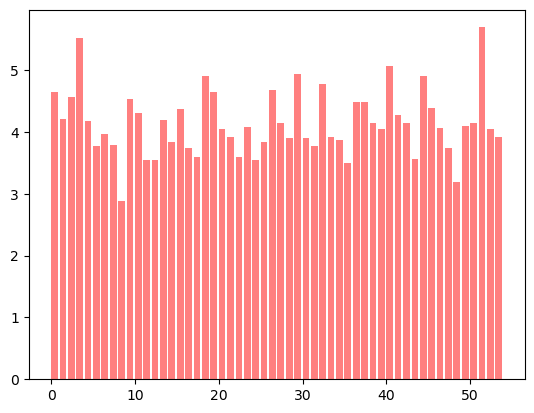

In [10]:
xAxis = np.arange(len(stateRound))
tick_locations = [num+0.4 for num in xAxis]

plt.bar(xAxis, stateRoundDF["PhysicalHealthDays"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, stateRoundDF["State"], rotation="vertical")
plt.show()

In [ ]:
stateRoundList = stateRound.values.tolist()
print(stateRoundList)

In [ ]:
stateRound.median()

In [ ]:
utDF = heartReducedDF.loc[
    (heartReducedDF['State']=="Utah")]
utHealth = utDF['PhysicalHealthDays'].mean()
utHistory = utDF.loc[
    (utDF['HadHeartAttack']=="Yes") | (utDF['HadAngina']=="Yes"), :]
attackCountUT = utHistory['HadHeartAttack'].value_counts() 
anginaCountUT = utHistory['HadAngina'].value_counts()
print(attackCountUT)
print(anginaCountUT)
print(utHealth)
utDF.head()

In [ ]:
stateGroup.max()

In [ ]:
wvDF = heartReducedDF.loc[
    (heartReducedDF['State']=="West Virginia")]
wvHealth = wvDF['PhysicalHealthDays'].mean()
wvHistory = wvDF.loc[
    (wvDF['HadHeartAttack']=="Yes") | (wvDF['HadAngina']=="Yes"), :]
attackCountWV = wvHistory['HadHeartAttack'].value_counts() 
anginaCountWV = wvHistory['HadAngina'].value_counts()
print(attackCountWV)
print(anginaCountWV)
print(wvHealth)
wvDF.head()

In [ ]:
stateGroup.min()

In [ ]:
dcDF = heartReducedDF.loc[
    (heartReducedDF['State']=="District of Columbia")]
dcHealth = dcDF['PhysicalHealthDays'].mean()
dcHistory = dcDF.loc[
    (dcDF['HadHeartAttack']=="Yes") | (dcDF['HadAngina']=="Yes"), :]
attackCountDC = dcHistory['HadHeartAttack'].value_counts() 
anginaCountDC = dcHistory['HadAngina'].value_counts()
print(attackCountDC)
print(anginaCountDC)
print(dcHealth)
dcDF.head()

In [12]:
genHealthGroupDF = heartReducedDF.groupby('State')['GeneralHealth'].value_counts()
genHealthGroupDF

State    GeneralHealth
Alabama  Good             638
         Very good        594
         Fair             322
         Excellent        249
         Poor              99
                         ... 
Wyoming  Very good        910
         Good             734
         Excellent        428
         Fair             266
         Poor              72
Name: count, Length: 270, dtype: int64

In [13]:
genDF = pd.DataFrame(genHealthGroupDF)
genDF.head()

count
State   GeneralHealth       
Alabama Good             638
        Very good        594
        Fair             322
        Excellent        249
        Poor              99